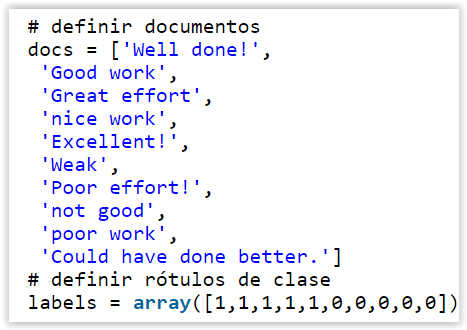

In [25]:
# Librerías
from numpy import array
from keras.preprocessing.text import one_hot
# one- hotes un proceso en el procesamiento de datos, para convertirlos en una representación de vector binario 
from keras.preprocessing.sequence import pad_sequences
#Pad_sequences se utiliza para garantizar que todas las secuencias de una lista tengan la misma longitud
from keras.models import Sequential
#Sequential es el modelo más simple es el modelo secuencial que solo permite que las capas se agreguen en secuencia
from keras.layers import Dense
#Dense es la capa regular de la red neuronal profundamente conectada
from keras.layers import Flatten
#Flatten convierte los elementos de la matriz  de entrada en un array plano
from keras.layers.embeddings import Embedding
#Una embedding de palabras es una representación aprendida de un texto, donde las palabras que tienen el mismo significado tienen una representación simila

# definir documentos
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# definir rótulos de clase
labels = array([1,1,1,1,1,0,0,0,0,0])

# enteros codifican los documentos
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

# documentos pad con una longitud máxima de 4 palabras
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(padded_docs)

# definir el modelo
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))   

# compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# resumir el modelo
model.summary()

# entrenar el modelo
model.fit(padded_docs, labels, epochs=100, verbose=0)

# evaluar el modelo
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Exactitud: %f'% (accuracy*100))

[[2, 21], [13, 2], [8, 32], [12, 2], [37], [14], [29, 32], [20, 13], [29, 2], [42, 31, 21, 41]]
[[ 0  0  2 21]
 [ 0  0 13  2]
 [ 0  0  8 32]
 [ 0  0 12  2]
 [ 0  0  0 37]
 [ 0  0  0 14]
 [ 0  0 29 32]
 [ 0  0 20 13]
 [ 0  0 29  2]
 [42 31 21 41]]
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 4, 8)              400       
_________________________________________________________________
flatten_24 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Exactitud: 89.999998
